# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [11]:
data=pd.read_csv("Iris.csv")
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Spliting the dataset in independent and dependent variables
X = data.iloc[:,:4].values
y = data['Species'].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [6]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [8]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [9]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]


# Data Visualization Techniques

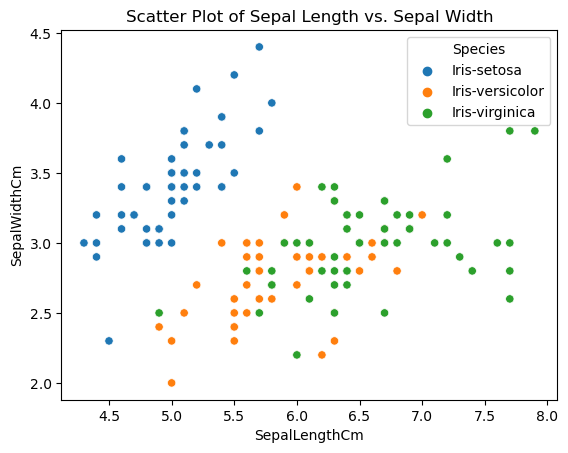

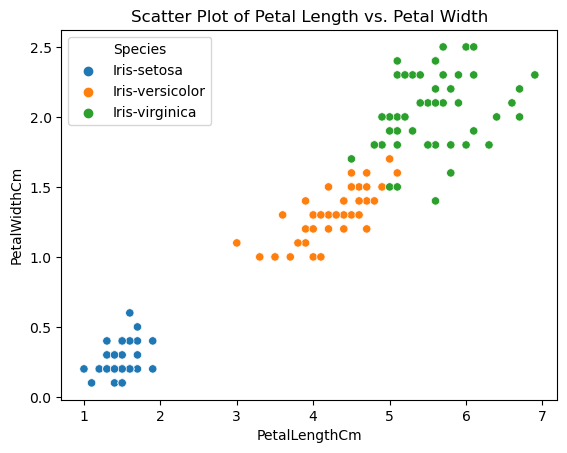

In [14]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.show()

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=data)
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.show()

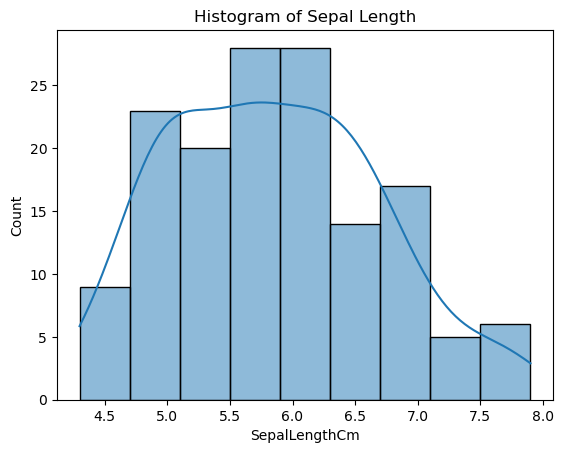

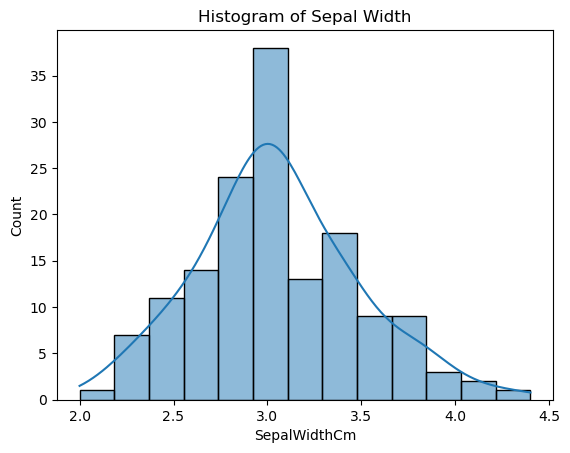

In [16]:
sns.histplot(data=data, x='SepalLengthCm', kde=True)
plt.title('Histogram of Sepal Length')
plt.show()

sns.histplot(data=data, x='SepalWidthCm', kde=True)
plt.title('Histogram of Sepal Width')
plt.show()

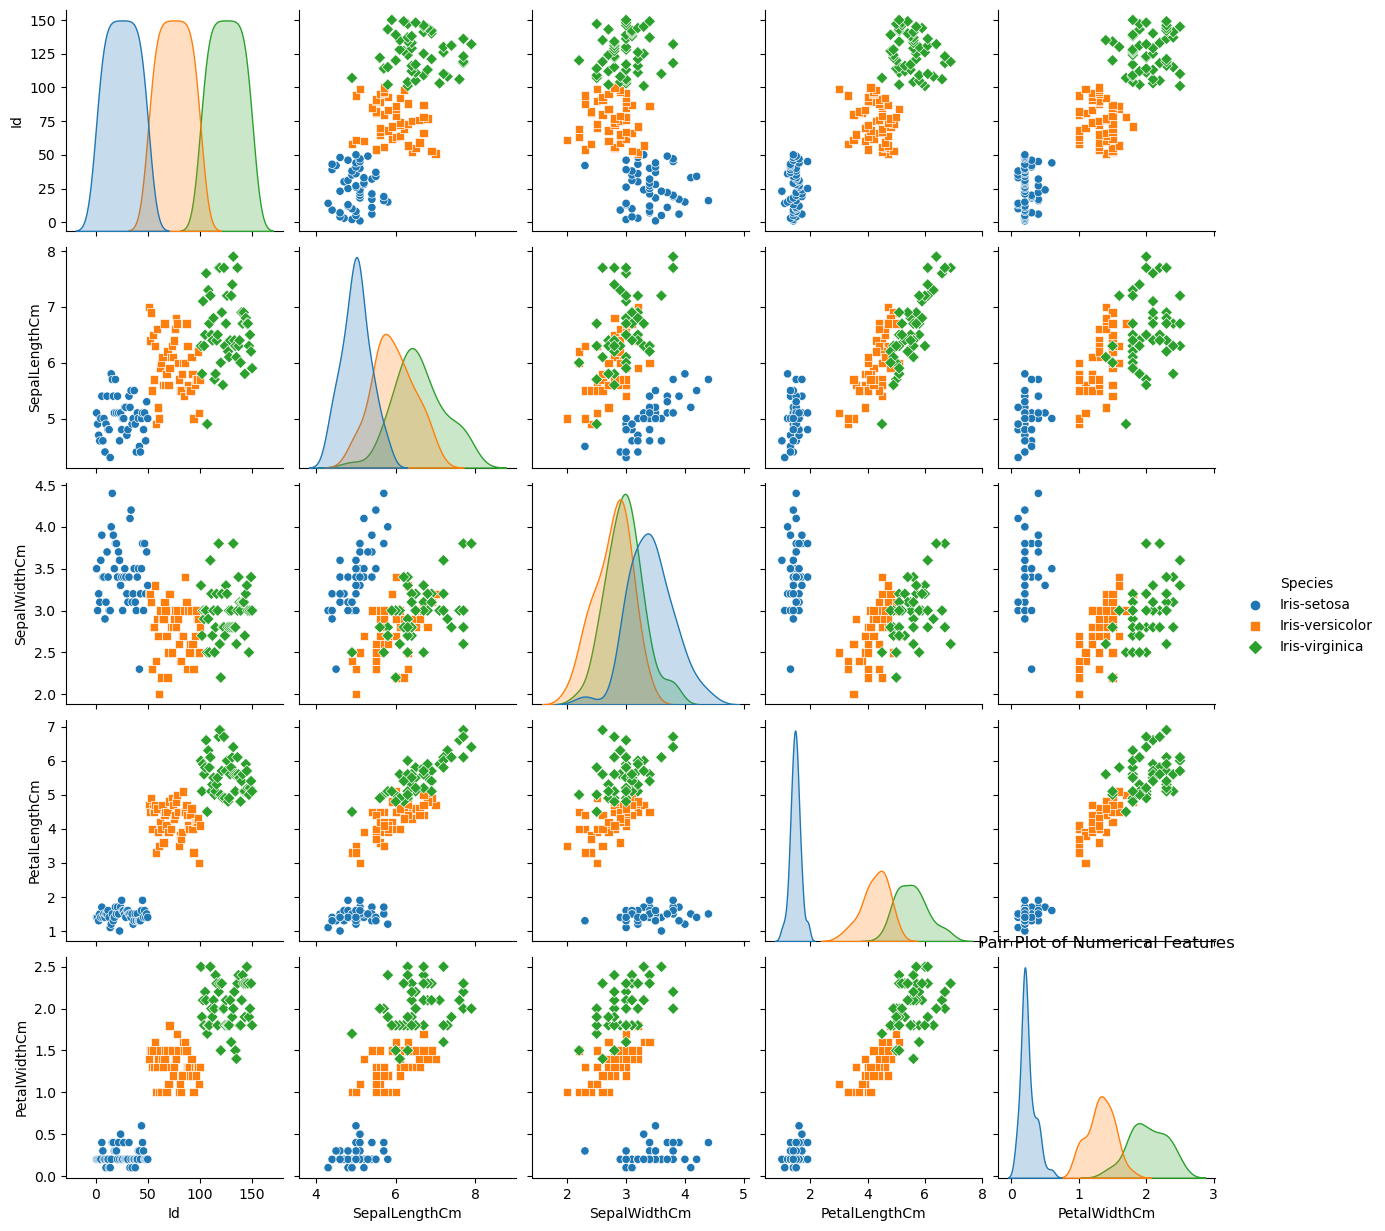

In [18]:
# Pair Plot (Scatter Matrix)
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.title('Pair Plot of Numerical Features')
plt.show()

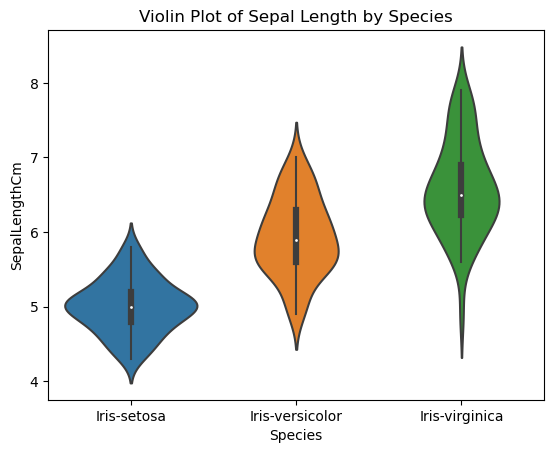

In [19]:
# Violin Plot
sns.violinplot(x='Species', y='SepalLengthCm', data=data)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

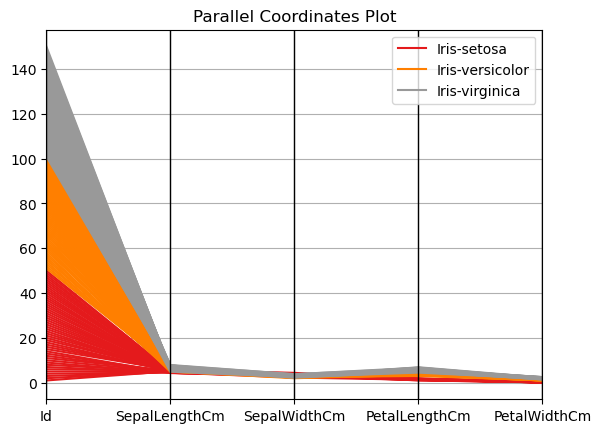

In [20]:
# Radar Chart
from pandas.plotting import parallel_coordinates

parallel_coordinates(data, 'Species', colormap=plt.get_cmap("Set1"))
plt.title('Parallel Coordinates Plot')
plt.show()